In [1]:
from pathlib import Path
import numpy as np
import pandas as pd

PROJ_DIRECTORY = Path.cwd().parent
DATA_DIRECTORY = PROJ_DIRECTORY / "data"
DEV_DIRECTORY = PROJ_DIRECTORY / "data_dev"
IMAGES_DIRECTORY = DEV_DIRECTORY / "images"

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
train_meta = pd.read_csv(DEV_DIRECTORY / "train_metadata.csv", index_col="image_id")
train_labels = pd.read_csv(DEV_DIRECTORY / "train_labels.csv", index_col="image_id")

In [3]:
# we didn't download the full training set, so add a column indicating which images are saved locally
train_meta["exists"] = train_meta.index.to_series().map(lambda x: (IMAGES_DIRECTORY / f"{x}.png").exists())
# filter our metadata down to only the images we have locally
train_meta = train_meta[train_meta.exists]

train_meta.head()

,spacecraft_id,background_id,exists
image_id,,,
100178090f6002cbd81d34896ab826e4,6,157,True
1002ee52da534ef4d5495f1b1fe463f7,18,10,True
1004dd5281b1c2086c9e62862bbb8515,11,168,True
1005515249a26a99d79d9db5025d3c66,5,8,True
1006e66f71ae40eb1409da105dc5642c,28,194,True


In [4]:
train_labels.head()

,xmin,ymin,xmax,ymax
image_id,,,,
0001954c9f4a58f7ac05358b3cda8d20,0,277,345,709
00054819240f9d46378288b215dbcd3a,753,602,932,725
000dbf763348037b46558bbcb6a032ac,160,434,203,481
000e79208bebd8e84ce6c22fd8612a0d,70,534,211,586
000f13aff94499d03e3997afc55b0aa0,103,0,312,193


In [5]:
import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def get_bbox(image_id, labels):
    """Get bbox coordinates as list from dataframe for given image id."""
    return labels.loc[image_id].loc[["xmin", "ymin", "xmax", "ymax"]].values.tolist()

def display_image(image_id, images_dir=IMAGES_DIRECTORY, show_bbox=False, labels=train_labels):
    """Display image given image ID. Annotate with bounding box if `show_bbox` is True."""
    img = cv2.imread(str(images_dir / f"{image_id}.png"))
    fig, ax = plt.subplots()
    # cv2 reads images as BGR order; we should flip them to RGB for matplotlib
    # ref: https://stackoverflow.com/questions/54959387/rgb-image-display-in-matplotlib-plt-imshow-returns-a-blue-image
    ax.imshow(np.flip(img, axis=-1))

    if show_bbox:
        xmin, ymin, xmax, ymax = get_bbox(image_id, labels)
        patch = Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, fill=False, edgecolor='white', linewidth=1)
        ax.add_patch(patch)

18045f4aa8c3ccb2ecdf854e385d8d34


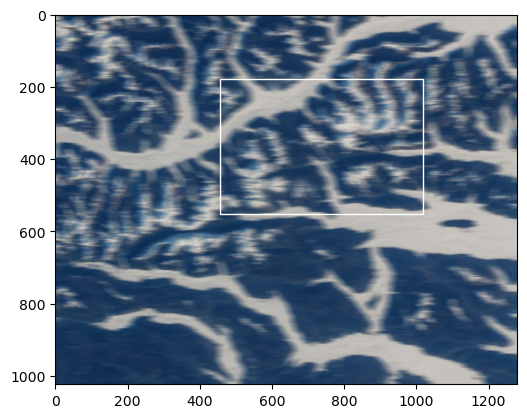

In [6]:
image_id = train_meta.sample(1).index[0]
print(image_id)

ax = display_image(image_id, show_bbox=True)

In [7]:
test_images = train_meta.sample(100, random_state=1).index.tolist()
test_images[:5]

['12d596ffe2415358c556848f624d6bd6',
 '15cf788528e20d9b41331e2487007cc0',
 '14e59bab8b9e35dcb3354419ec8db752',
 '1f764019af6351eba30c9f063a42db98',
 '1f4463bad0bc4e5f934bb24c5918db43']

In [8]:
import shutil

dest_dir = DATA_DIRECTORY / "images"
if not dest_dir.exists():
    dest_dir.mkdir(parents=True, exist_ok=True)

for img in test_images:
    shutil.copy2(IMAGES_DIRECTORY / f"{img}.png", dest_dir / f"{img}.png")

In [9]:
submission_format = pd.read_csv(DEV_DIRECTORY / "submission_format.csv", index_col="image_id")
submission_format_val = submission_format.loc[test_images]
submission_format_val.to_csv(DATA_DIRECTORY / "submission_format.csv")

In [10]:
train_labels = pd.read_csv(DEV_DIRECTORY / "train_labels.csv", index_col="image_id")
test_labels = train_labels.loc[test_images]
test_labels.to_csv(DATA_DIRECTORY / "test_labels.csv")

In [11]:
#pip install ultralytics

In [12]:
# do i have to run this everytime?
from ultralytics import YOLO
model = YOLO("yolov8n.pt")
shutil.move('yolov8n.pt', PROJ_DIRECTORY / "example_benchmark" / "yolov8n.pt")

100%|██████████| 6.23M/6.23M [00:28<00:00, 231kB/s] 


PosixPath('/Users/mukulsherekar/pythonProject/spacecraft-pose-object-detection-runtime/example_benchmark/yolov8n.pt')

The folder data_dev/images does not exist.
Number of PNG files in the folder: None
